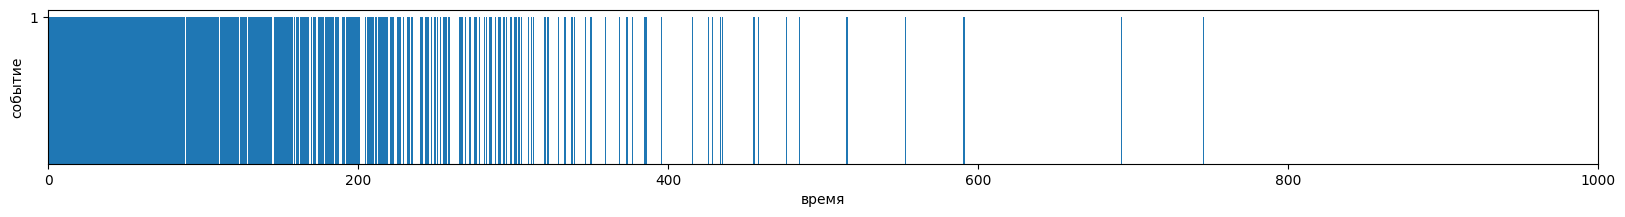

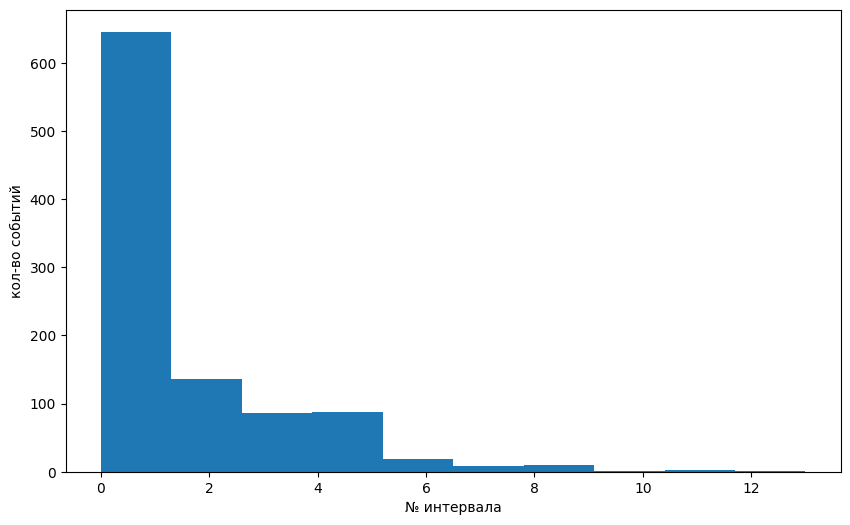

In [3]:
from math import log, exp
from matplotlib import pyplot as plt
import numpy as np
import random
import uuid

TO_GENERATE = 999
BORDER = 9000
LAMBDA = 0.01
DEVIDER = 9

random_numbers: list[float] = [random.uniform(0,1) for i in range(1, TO_GENERATE)]
processed_numbers: list[float] = [-log(i) / LAMBDA for i in random_numbers] # Length = TO_GENERATE

# plt.plot(processed_numbers)
# plt.show()

output: dict = {}

temp = processed_numbers[0]
for i in range(0, len(processed_numbers)):
    output[temp] = 1
    temp += processed_numbers[i]

j = {}
for i in processed_numbers:
    j[i] = 1

_uuid = uuid.uuid4().hex
plt.close('all')
plt.rcParams["figure.figsize"] = [20, 2]
plt.xlabel("время")
plt.ylabel("событие")
plt.bar(j.keys(), j.values())  # type: ignore
plt.yticks([1])
plt.xlim(0,1000)
plt.savefig(f'images/events/{_uuid}.png')
plt.show()

to_hist: list = []
output_keys: list = list.copy(list(output.keys()))
jkeys: list = list.copy(list(j.keys()))
counter = 0
interval_length = 50
jkeys.sort()

interval_number = 0
for i in range(0, len(jkeys) - 1):
    if jkeys[i] > (max(jkeys) // interval_length) * interval_length:
        break
    if jkeys[i] > interval_number * interval_length and \
            jkeys[i] <= interval_number * interval_length + interval_length:
        to_hist += [interval_number]
    else:
        interval_number += 1
        checker = False
        while not checker:
            if jkeys[i] > interval_number * interval_length and \
                    jkeys[i] <= interval_number * interval_length + interval_length:
                to_hist += [interval_number]
                checker = True
                break
            interval_number += 1

plt.close('all')
plt.rcParams["figure.figsize"] = [10, 6]
plt.hist(to_hist)
plt.xlabel("№ интервала")
plt.ylabel("кол-во событий")
plt.savefig(f'images/histograms/{_uuid}.png')
plt.show()


0.02767170736795744 0.02767170736795744 398.11555625905885 198.67593615933635 200 200 3.7688874818823024


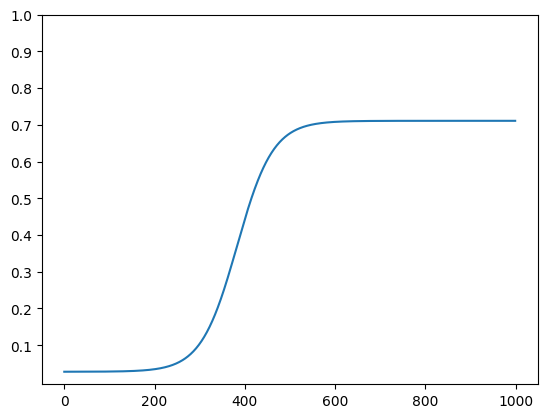

In [73]:
from patterns import *

pattern = Sigmoid()

pattern.random_start_values(200, 0.01, 0.4, 200, 0.05)

coords = pattern.generate_coordinates()

from matplotlib import pyplot as plt
plt.plot(coords.keys(), coords.values())
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.show()

GeneratorWorker: Attached an observer %s <__main__.Observer object at 0x0000000007D55B70>
GeneratorWorker: Notifying observers...


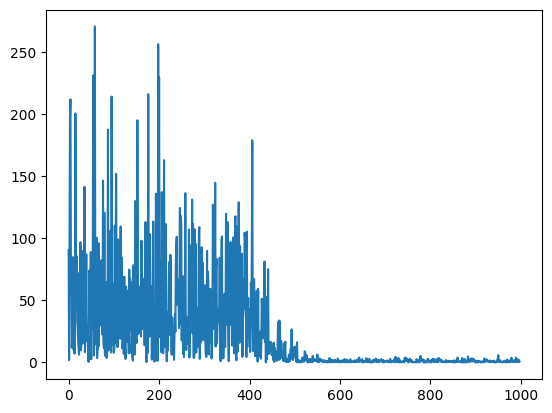

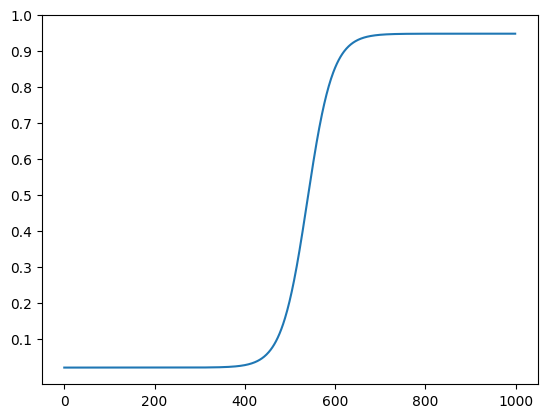

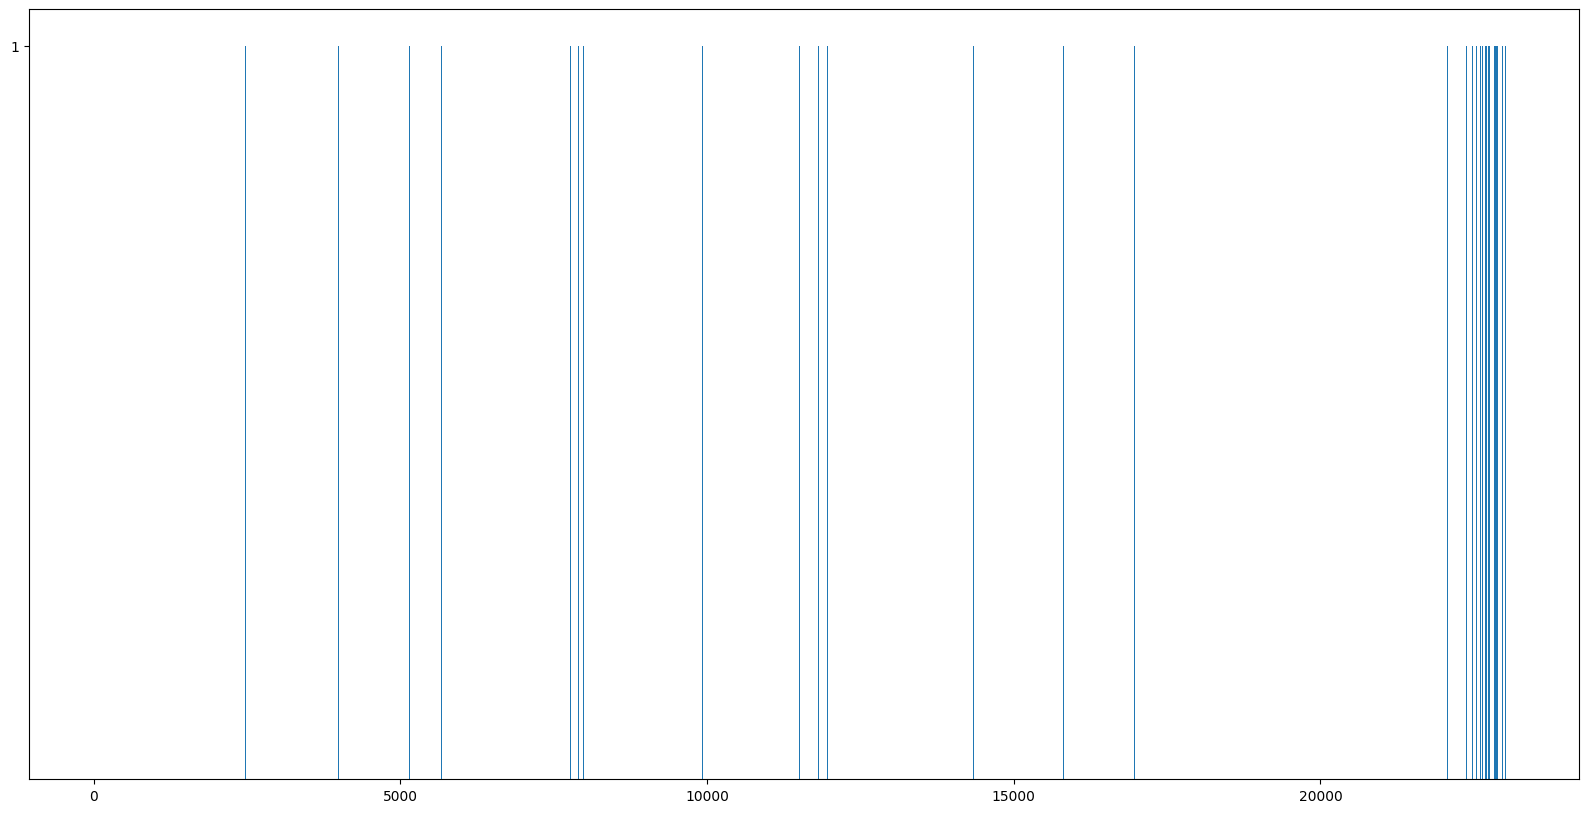

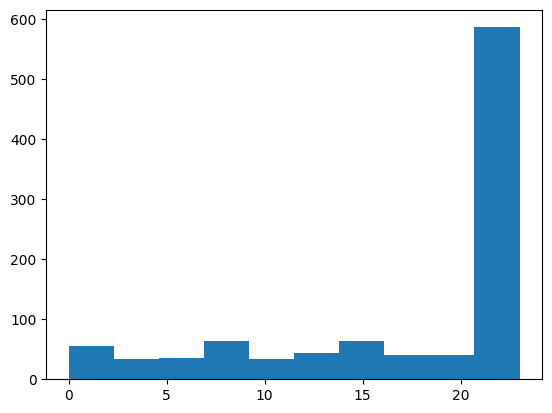

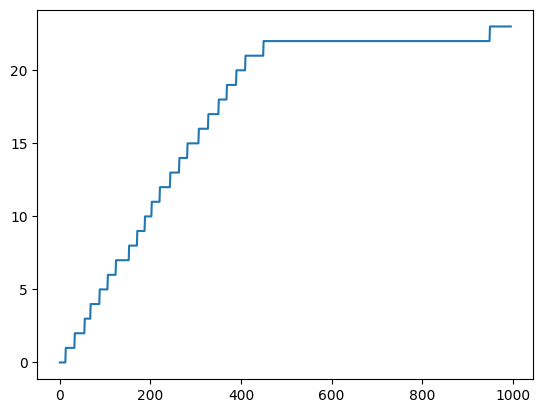

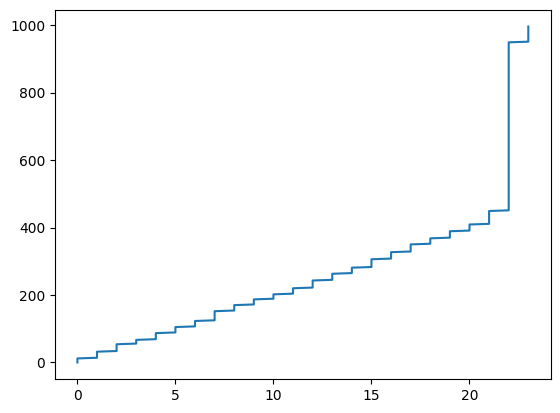

GeneratorWorker: Notifying observers...


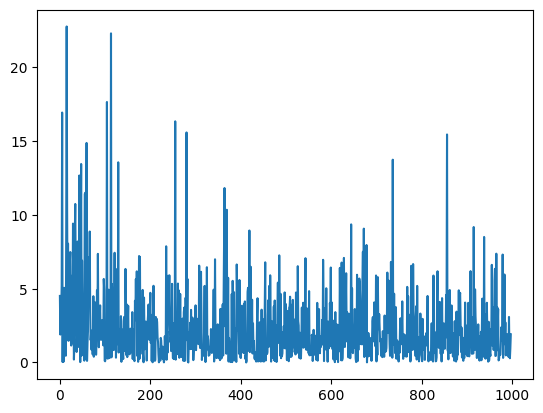

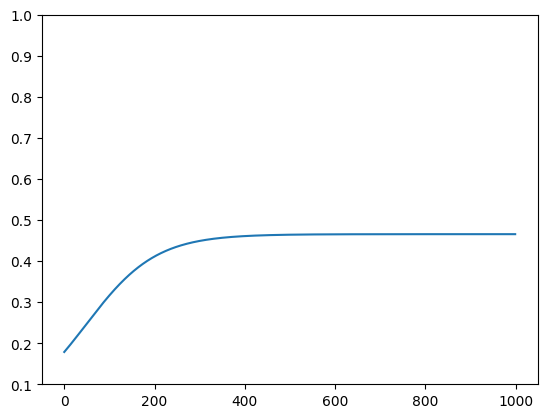

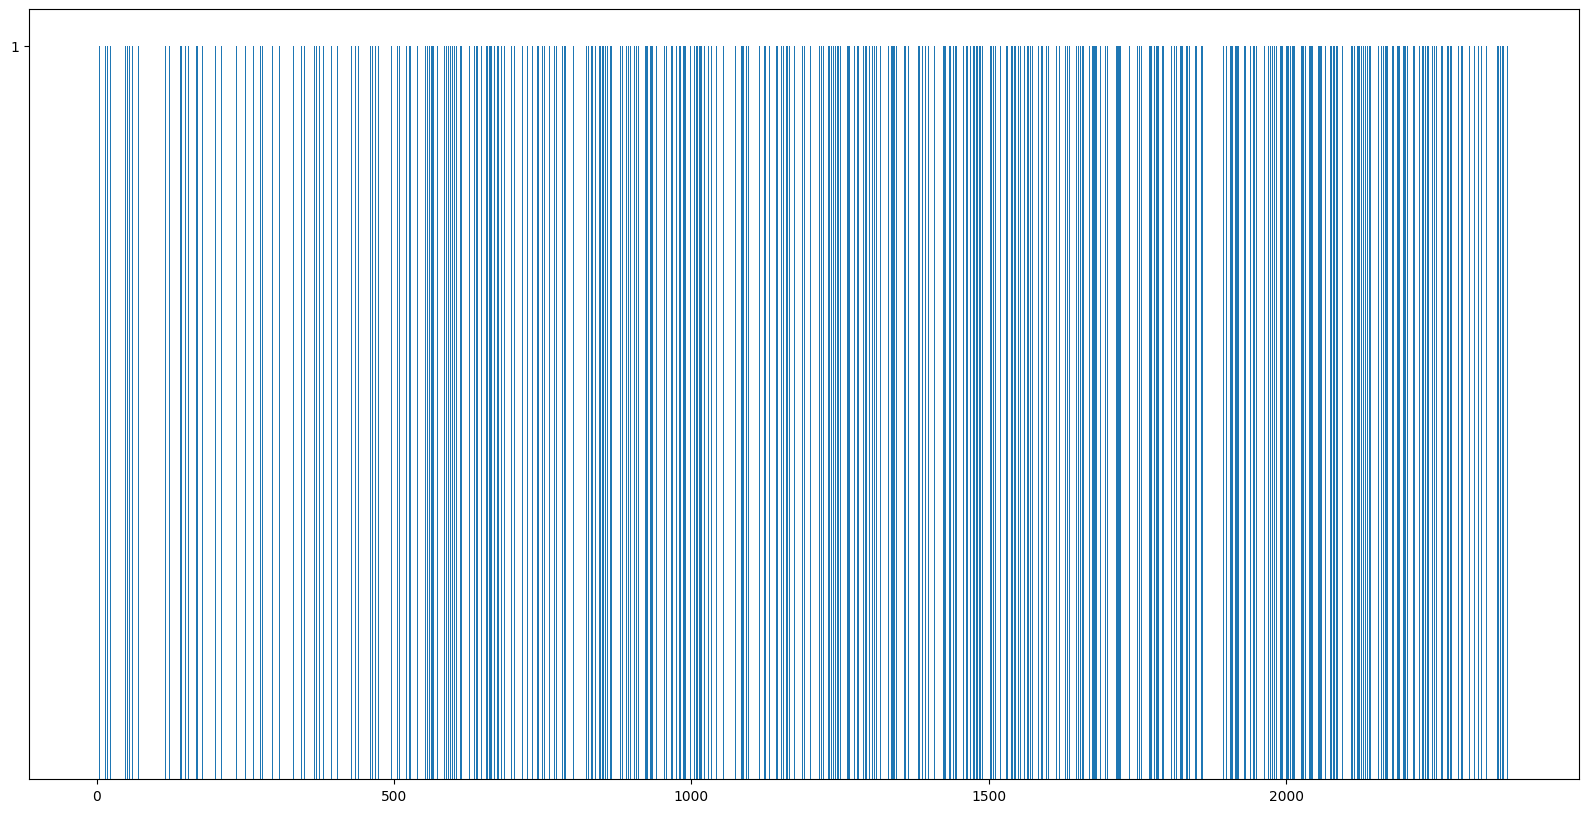

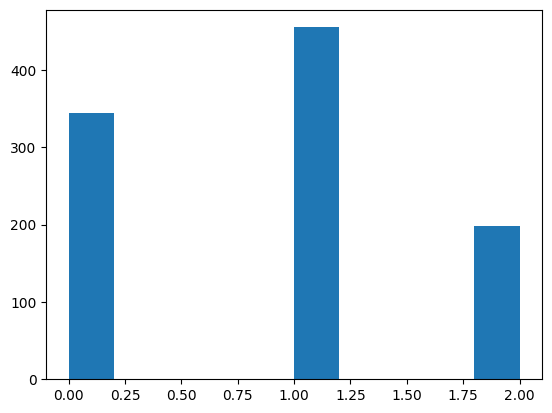

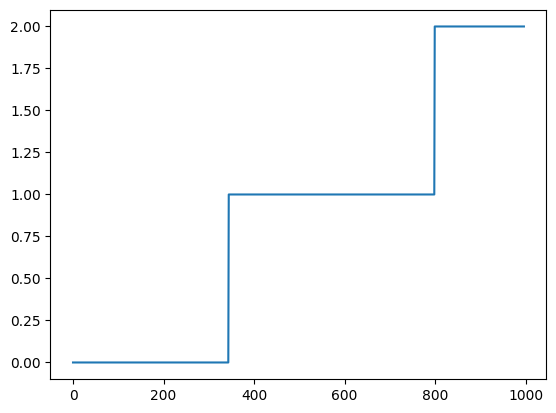

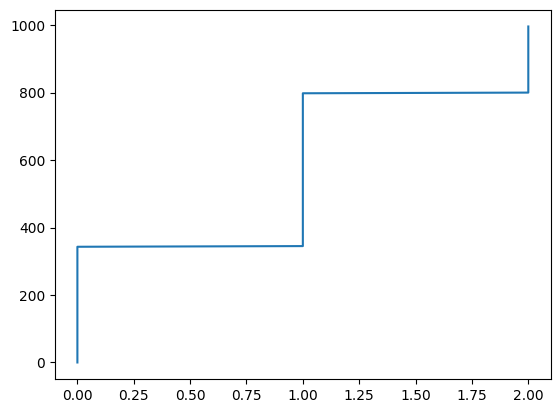

GeneratorWorker: Notifying observers...


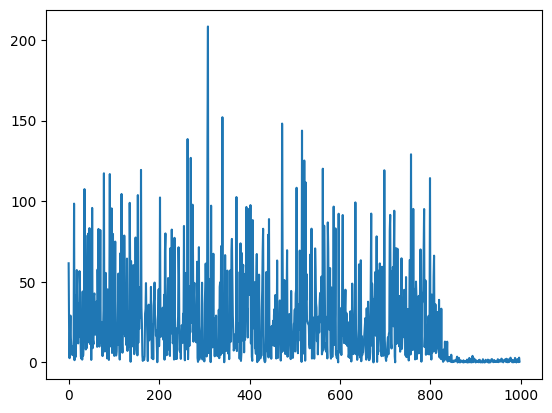

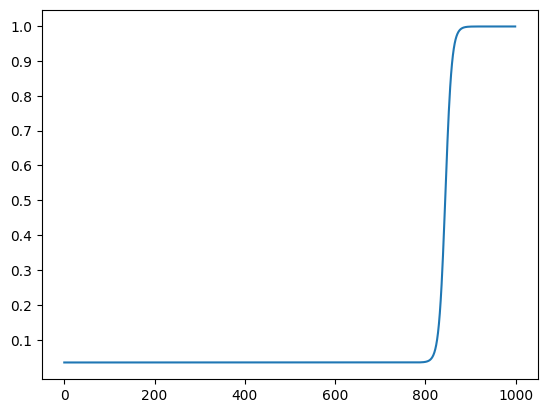

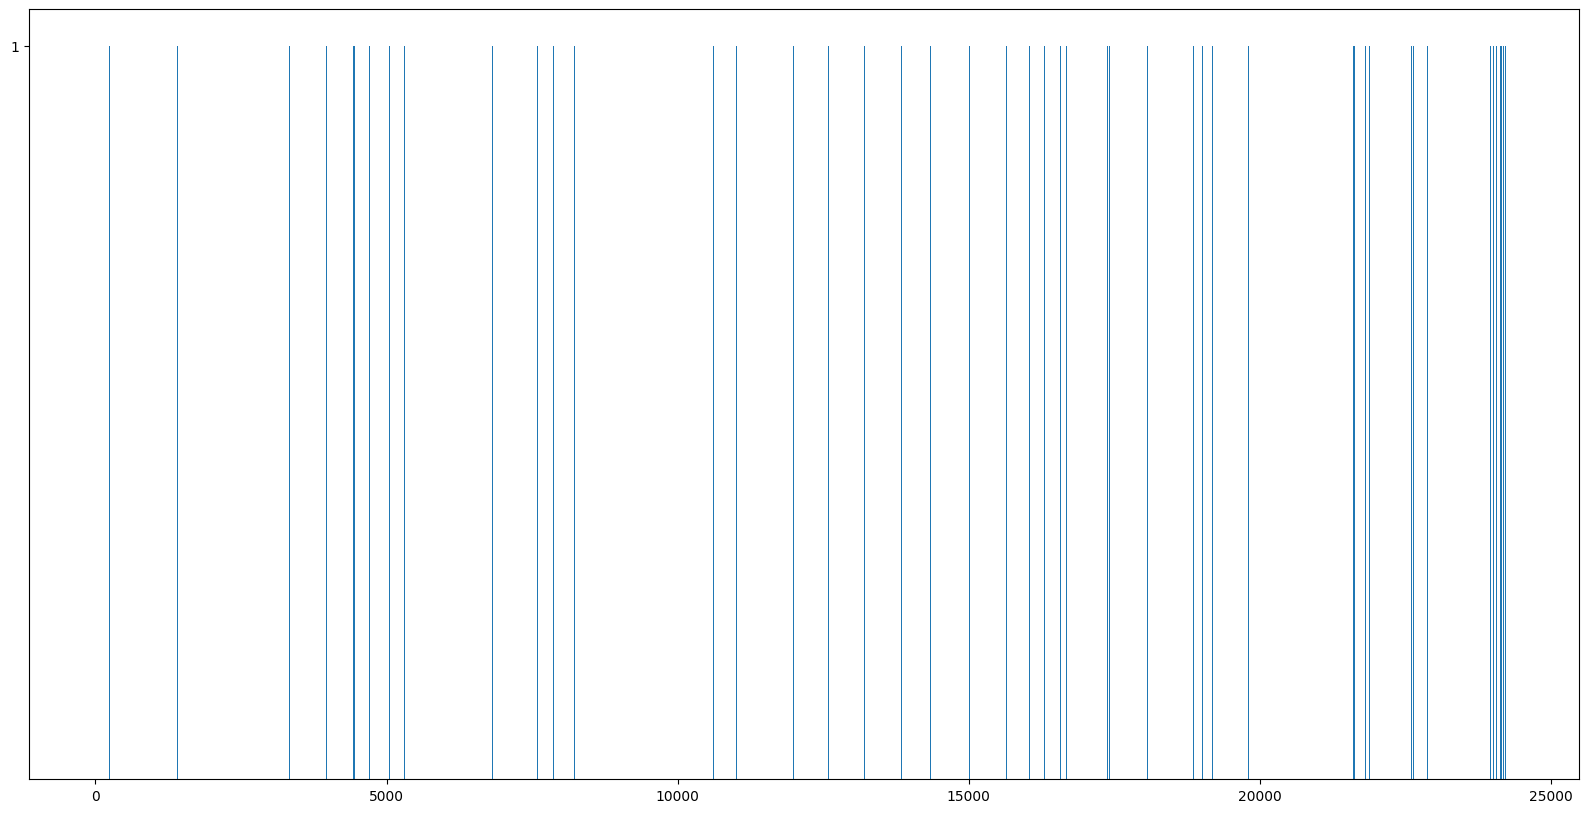

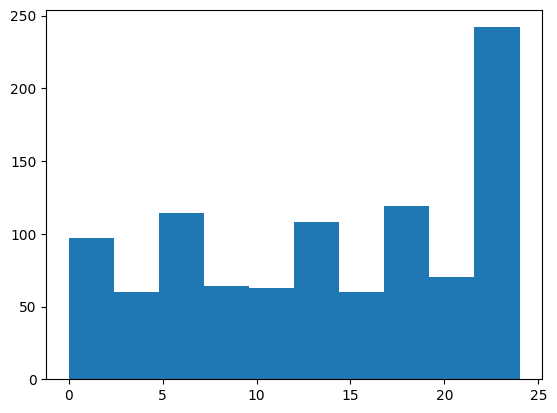

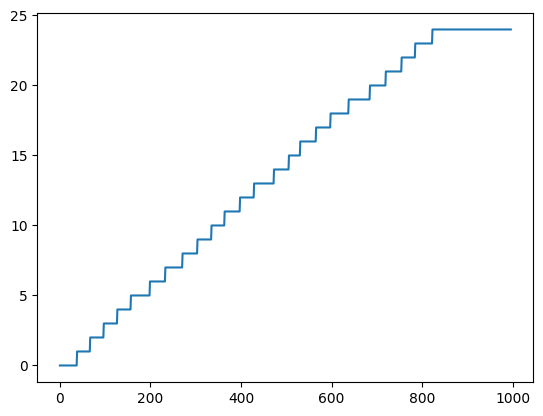

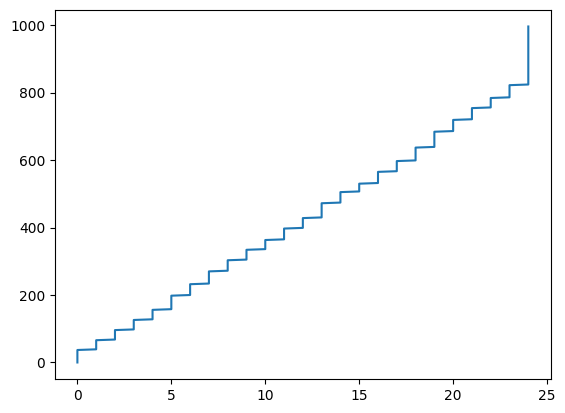

Done!


In [1]:
from core import *
from patterns import *
from matplotlib import pyplot as plt
import random
from math import log

generatorWorker = GeneratorWorker()
pattern = Sigmoid(min_end_x=1000)
generatorWorker.set_pattern(pattern)


TO_GENERATE = 999
BORDER = 10000
DEVIDER = 10
INTERVAL_LENGTH = BORDER / DEVIDER


# TODO: #6 построение гистограмм
class Observer(ObserverBase):
    def onNewData(self, coordinates: dict[float, float]) -> None:
        random_numbers: list[float] = [random.uniform(0,1) for i in range(1, TO_GENERATE)]
        processed_numbers: list[float] = [-log(random_numbers[i]) / coordinates[i] for i in range(len(random_numbers))] # Length = TO_GENERATE
        plt.plot(processed_numbers)
        plt.show()
        plt.plot(coordinates.keys(), coordinates.values())
        plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        plt.show()
        output: dict = {}

        temp = processed_numbers[0]
        for i in range(0, len(processed_numbers)):
            output[temp] = 1
            temp += processed_numbers[i]

        plt.figure(figsize=(20,10))
        plt.bar(output.keys(), output.values())  # type: ignore
        plt.yticks([1])
        plt.show()

        intervals: list = [i*INTERVAL_LENGTH for i in range(1, DEVIDER)]
        to_hist: list = []
        output_keys: list = list.copy(list(output.keys()))
        counter = 0
        interval_number = 0

        output_as_function: dict[int, int] = {} # Сколько лежит чисел (по X) для интервала (по Y)
        output_as_function_reversed_x: list = []
        output_as_function_reversed_y: list = []

        for i in range(0, len(output_keys)-1):
            # print(output_keys[i], interval_number*INTERVAL_LENGTH,interval_number*INTERVAL_LENGTH+INTERVAL_LENGTH)
            if output_keys[i] > interval_number*INTERVAL_LENGTH and output_keys[i] <= interval_number*INTERVAL_LENGTH+INTERVAL_LENGTH:
                to_hist+=[interval_number]
                output_as_function[i] = interval_number
                output_as_function_reversed_x += [interval_number]
                output_as_function_reversed_y += [i]
            else:
                interval_number+=1
                checker = False
                while not checker:
                    if output_keys[i] > interval_number*INTERVAL_LENGTH and output_keys[i] <= interval_number*INTERVAL_LENGTH+INTERVAL_LENGTH:
                        to_hist+=[interval_number]
                        output_as_function[i] = interval_number
                        checker = True
                        break
                    interval_number+=1
        # print(to_hist)
        plt.hist(to_hist)
        plt.show()

        plt.plot(output_as_function.keys(), output_as_function.values())
        plt.show()

        plt.plot(output_as_function_reversed_x, output_as_function_reversed_y)
        plt.show()

observer = Observer()

generatorWorker.attach(observer)
generatorWorker.run(100, 0.01, 0.4, 0.05)